# Trabajo práctico integrador

**Nombre**:

## Primera Parte (Clase 1 y 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [9]:
x = np.random.randint(5, size=(3,3))
print("La matriz es: \n",x)


def norms(p):

    size = len(x)
    for i in range(size):
        if p != 0 and p != np.inf:
            norm_p = np.sum(abs(x[i]) ** p) ** (1/p)
            if p == 1:
                print(f"Las norma l1 del vector {i+1}: ",norm_p)
            else:
                print(f"Las normas l2 de los vector {i+1}: ",norm_p)
        elif p == 0:
            norm_p = np.sum(abs(x[i]) != 0) #cantidad de elementos no nulos
            print(f"Las norma l0 de los vector {i+1}: ",norm_p)
        else:
            norm_p = np.max((abs(x[i])))
            print(f"La norma inf del vector {i+1}: ",norm_p)
    return 0

#norm l1
p_l1 = 1
norms(p_l1)

#norm l2
p_l2 = 2
norms(p_l2)

#norm l0
p_l0 = 0
norms(p_l0)

#norm inf
p_linf = np.inf
norms(p_linf)

La matriz es: 
 [[1 2 0]
 [0 2 2]
 [2 3 3]]
Las norma l1 del vector 1:  3.0
Las norma l1 del vector 2:  4.0
Las norma l1 del vector 3:  8.0
Las normas l2 de los vector 1:  2.23606797749979
Las normas l2 de los vector 2:  2.8284271247461903
Las normas l2 de los vector 3:  4.69041575982343
Las norma l0 de los vector 1:  2
Las norma l0 de los vector 2:  2
Las norma l0 de los vector 3:  3
La norma inf del vector 1:  2
La norma inf del vector 2:  2
La norma inf del vector 3:  3


0

### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [8]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

#using logical AND to get the TP op: 1 and 1 = true
compare01_and = np.logical_and(truth,prediction)
print(compare01_and)
#seeking true values and sum them to get tp
tp_rate = len(compare01_and[np.nonzero(compare01_and == 1)])
print("TP: ",tp_rate)

#using logical OR since there should be just one false = 0 or 0 
compare02 = np.logical_or(truth,prediction)
print(compare02)
#seeking true values and sum them to get tn
tn_rate = len(compare02[np.nonzero(compare02 == 0)])
print("TN: ",tn_rate)

#using XOR against first AND vs truth array will give me FN
compare03 = np.logical_xor(compare01_and,truth)
print(compare03)
#getting the rate of FN
fn_rate = len(compare03[np.nonzero(compare03 == 1)])
print("FN: ",fn_rate)

compare04 = np.logical_xor(compare01_and,prediction)
print(compare04)
fp_rate = len(compare04[np.nonzero(compare04 == 1)])
print("FP: ",fp_rate)

precision = (tp_rate)/(tp_rate + fp_rate)
recall = (tp_rate)/(tp_rate + fn_rate)
accuracy = (tp_rate + tn_rate)/(tp_rate + tn_rate + fp_rate + fn_rate)
print(f"Precision: {precision}, Recall: {recall}, Accuracy: {accuracy}")

[ True  True False  True False False False False False False]
TP:  3
[ True  True  True  True  True  True  True  True False  True]
TN:  1
[False False False False  True  True False False False  True]
FN:  3
[False False  True False False False  True  True False False]
FP:  3
Precision: 0.5, Recall: 0.5, Accuracy: 0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [ ]:
# ejercicio 3

## Segunda Parte (Clase 3 y 4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [2]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [3]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


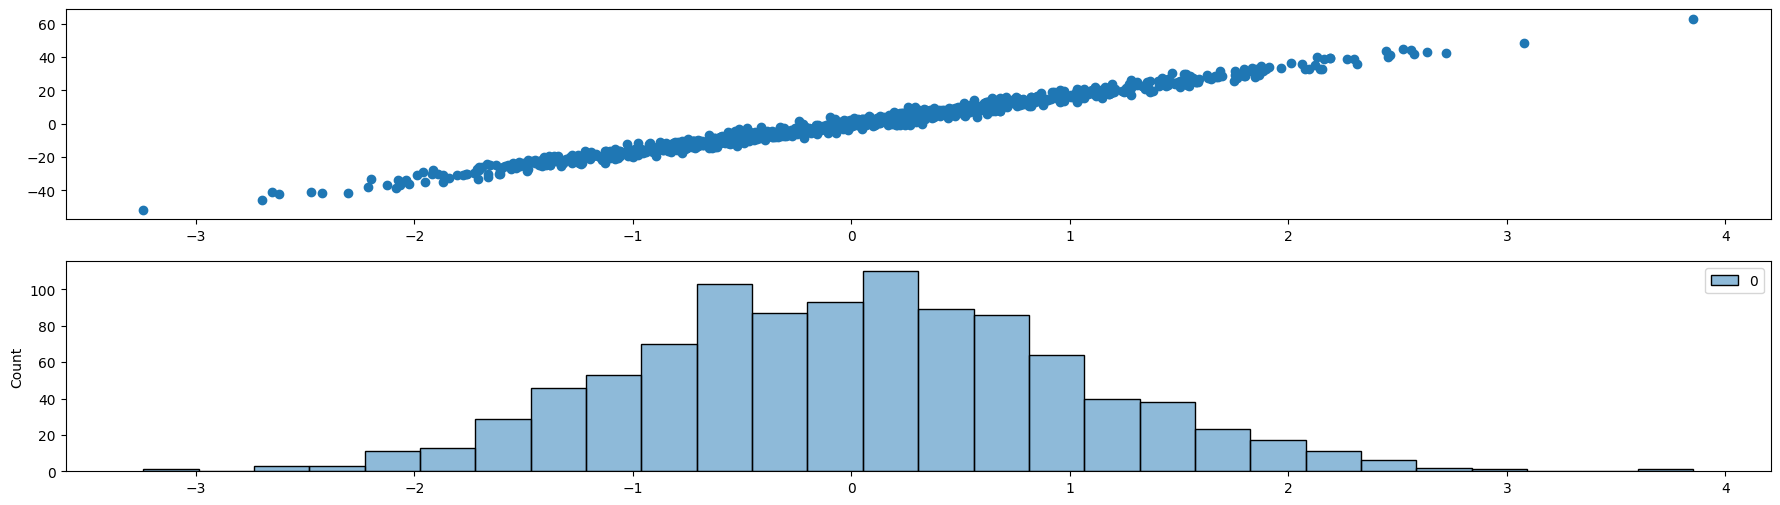

In [4]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [6]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [7]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

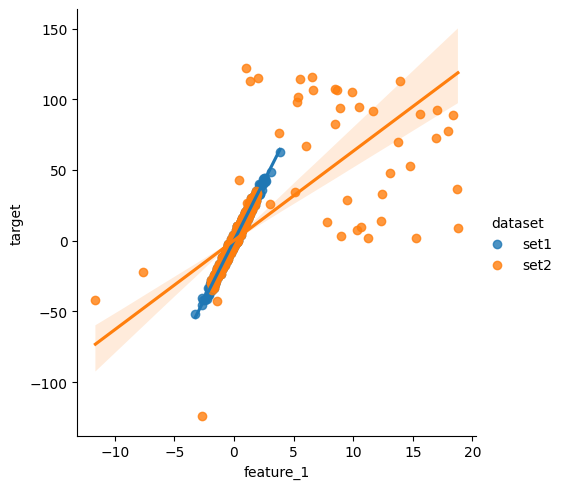

In [8]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [83]:
def split(df: pd.DataFrame, train_percentage: float):
    
    np.random.seed(0)
    df_length = df.shape[0]
    train_size = int(len(dataset) * train_percentage)
    #Permuting rows in the dataset to avoid any kind of pattern
    permute_index = np.random.permutation(df_length)
    #get train data using slicing
    train_df = permute_index[0:train_size]
    print(train_df)
    #get validation data using slicing
    valid_df = permute_index[train_size:int(df_length - 0.1 * df_length)]
    print(valid_df)
    #get test data
    test_df = permute_index[int(df_length - 0.1 * df_length):df_length]
    print(test_df)

    #defining X
    x = df[['Number-of-cars']]
   # y = df['Rush-hour']

    X_train = x[train_df]
    print(X_train)

    return 0 #X_train, X_val, X_test, Y_train, Y_val, Y_test

#Generating data
num_car = np.random.randint(5,200, size=(10))
rush_hour = np.random.binomial(1,0.5,size=[10])
data = {'Number-of-cars': num_car, 
        'Rush-hour': rush_hour}
print(f"Generating data:\n {data}\n")
#Generating data frame
dataset = pd.DataFrame(data)
print(f"Dataset:\n {dataset}\n")
#training size
train_percentage = 0.7
print(f"training percentage: {train_percentage}")

#splitting dataset in train, validation and test
splitting = split(dataset, train_percentage)

Generating data:
 {'Number-of-cars': array([ 41,  92,  75,  93, 145,  63, 198,  44,  92, 179]), 'Rush-hour': array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1])}

Dataset:
    Number-of-cars  Rush-hour
0              41          1
1              92          1
2              75          0
3              93          0
4             145          0
5              63          1
6             198          1
7              44          1
8              92          1
9             179          1

training percentage: 0.7
[2 8 4 9 1 6 7]
[3 0]
[5]


KeyError: "None of [Int64Index([2, 8, 4, 9, 1, 6, 7], dtype='int64')] are in the [columns]"

### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

In [17]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

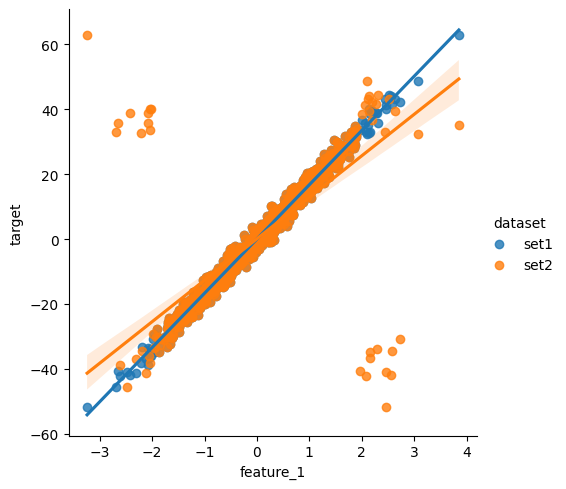

In [18]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`